In [1]:
# @title import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [2]:
#@title load the dataset
df = pd.read_csv('train-set.csv')
df.head()

CustomerID  Gender Married  Age Graduated     Profession  WorkExperience  \
0      462809    Male      No   22        No     Healthcare             1.0   
1      462643  Female     Yes   38       Yes       Engineer             NaN   
2      466315  Female     Yes   67       Yes       Engineer             1.0   
3      461735    Male     Yes   67       Yes         Lawyer             0.0   
4      462669  Female     Yes   40       Yes  Entertainment             NaN   

  SpendingScore  FamilySize    Category Segmentation  
0           Low         4.0  Category 4            D  
1       Average         3.0  Category 4            A  
2           Low         1.0  Category 6            B  
3          High         2.0  Category 6            B  
4          High         6.0  Category 6            A

In [3]:
#@ title Check for duplicates
print('Shape of dataset:', df.shape)
print('Number of duplicates', df['CustomerID'].duplicated().sum())

Shape of dataset: (8068, 11)
Number of duplicates 0


In [4]:
#@title structure of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      8068 non-null   int64  
 1   Gender          8068 non-null   object 
 2   Married         7928 non-null   object 
 3   Age             8068 non-null   int64  
 4   Graduated       7990 non-null   object 
 5   Profession      7944 non-null   object 
 6   WorkExperience  7239 non-null   float64
 7   SpendingScore   8068 non-null   object 
 8   FamilySize      7733 non-null   float64
 9   Category        7992 non-null   object 
 10  Segmentation    8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [5]:
#@title check for missing values
df.isna().sum()

CustomerID          0
Gender              0
Married           140
Age                 0
Graduated          78
Profession        124
WorkExperience    829
SpendingScore       0
FamilySize        335
Category           76
Segmentation        0
dtype: int64

In [6]:
#@title validate dataset
df['CustomerID'].nunique()

8068

# **Exploratory Data Analysis**

In [7]:
#@title Change column headers to lower case
df.columns = df.columns.str.lower()

In [8]:
#@title Explore gender
nGender = df['gender'].nunique()
g = df['gender'].unique()
cGender = df.gender.value_counts()

print('The gender variable has {} unique categories and they are" {}'.format(nGender, g))
print('')
print(cGender)

The gender variable has 2 unique categories and they are" ['Male' 'Female']

Male      4417
Female    3651
Name: gender, dtype: int64


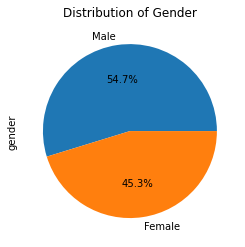

In [9]:
#@title visualize the distribution of gender
cGender.plot.pie(autopct = '%1.1f%%')

# label chart
plt.title('Distribution of Gender');

In [10]:
#@title Explore marriage status
nMarried = df['married'].nunique()
m = df['married'].unique()
cMarried = df.married.value_counts()

print('The married variable has {} unique categories and they are" {}'.format(nMarried, m))
print('')
print(cMarried)

The married variable has 2 unique categories and they are" ['No' 'Yes' nan]

Yes    4643
No     3285
Name: married, dtype: int64


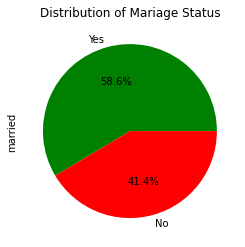

In [11]:
cMarried.plot.pie(autopct = '%1.1f%%', colors = ['green', 'red'])

plt.title('Distribution of Mariage Status');

In [12]:
df.columns

Index(['customerid', 'gender', 'married', 'age', 'graduated', 'profession',
       'workexperience', 'spendingscore', 'familysize', 'category',
       'segmentation'],
      dtype='object')

In [13]:
num_cols = [
    'age', 'workexperience', 'familysize'
]
cat_cols = [
    'gender', 'married', 'graduated', 'profession', 'spendingscore'
]


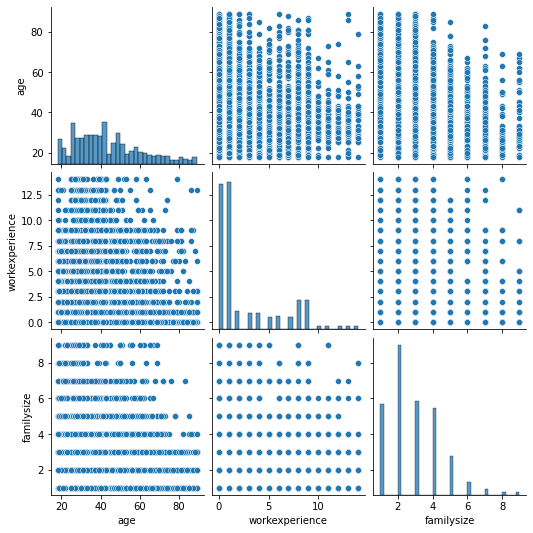

In [14]:
#@title explore the numeric variables in the dataset
sns.pairplot(df.loc[:, num_cols]);

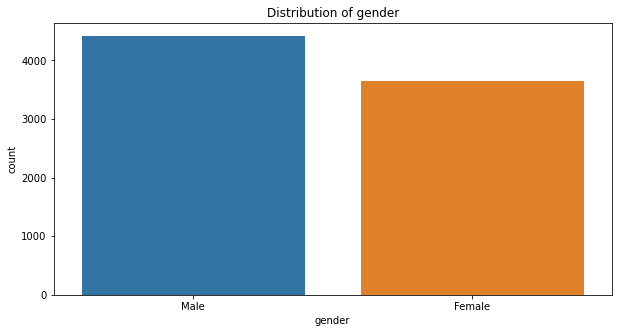

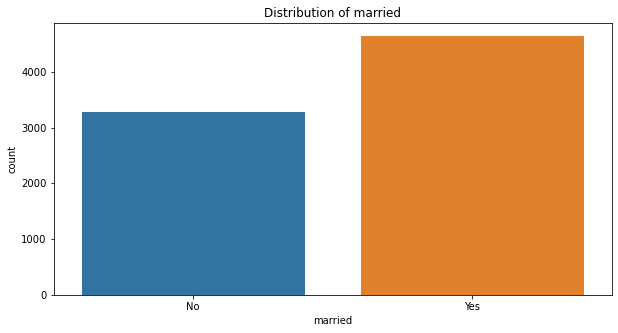

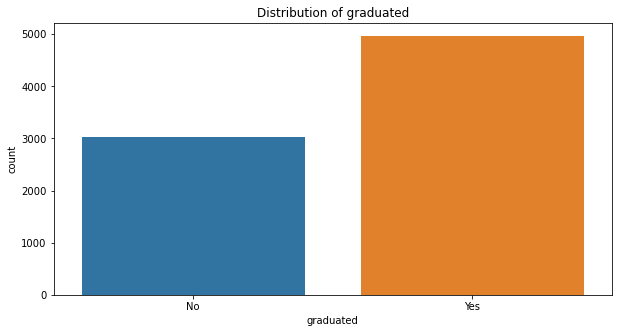

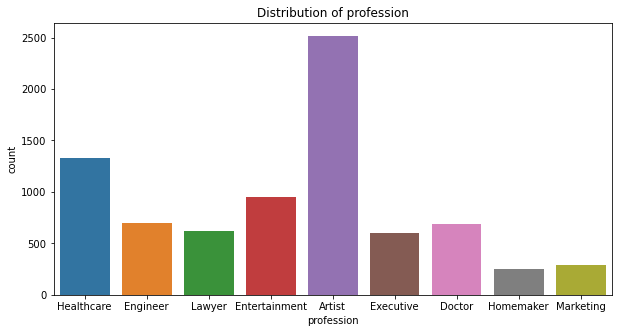

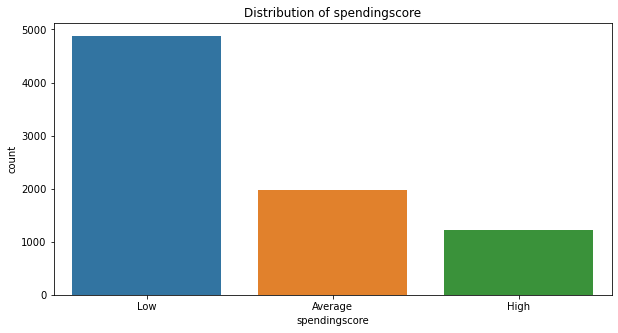

In [15]:
#@title explore the categorical variables in the dataset
for v in cat_cols:
  plt.figure(figsize=(10, 5))
  sns.countplot(x = v, data= df.loc[:, cat_cols])
  plt.title('Distribution of {}'.format(v));

# **Data Preprocessing**

In [16]:
#@title transform the binary categorical variables
df['gender'] = df['gender'].apply(lambda x:1 if x == "Female" else 2)

In [17]:
#@title transform the marriage status variable

# get the mode
mode = df['married'].mode()[0]
# impute missing values with the mode
df['married'].fillna(mode, inplace = True)
df['married'].isna().sum()

# encode the values
df['married'] = df['married'].apply(lambda x:1 if x == 'Yes' else 0)
df['married'].head()

0    0
1    1
2    1
3    1
4    1
Name: married, dtype: int64

In [18]:
#@title transform the graduation status variable

# get the mode
mode = df['graduated'].mode()[0]
# impute missing values with the mode
df['graduated'].fillna(mode, inplace = True)
df['graduated'].isna().sum()

# encode the values
df['graduated'] = df['graduated'].apply(lambda x:1 if x == 'Yes' else 0)
df['graduated'].head()

0    0
1    1
2    1
3    1
4    1
Name: graduated, dtype: int64

In [19]:
#@title preprocess profession
mode = df['profession'].mode()[0]
df['profession'].fillna(mode, inplace = True)
df['profession'] = df['profession'].replace({
    'Healthcare': 1, 'Engineer':2, 'Lawyer':3, 'Entertainment':4,
    'Artist':5,'Executive':6, 'Doctor':7, 'Homemaker':8, 'Marketing':9
})
df['profession'].head()

0    1
1    2
2    2
3    3
4    4
Name: profession, dtype: int64

In [20]:
#@title impute missing values in work experience
median = df['workexperience'].median()
df['workexperience'].fillna(median, inplace = True)
df['workexperience'].isna().sum()

0

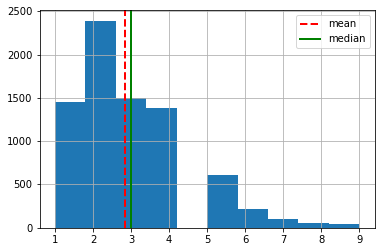

In [21]:
#@title impute missing values in family size
mean = df['familysize'].mean()
median = df['familysize'].median()

df['familysize'].hist()
plt.axvline(mean, color = 'r', linewidth = 2, linestyle = '--', label = 'mean')
plt.axvline(median, color = 'g', linewidth = 2, linestyle = '-', label = 'median')
plt.legend();

In [22]:
df['familysize'].fillna(median, inplace = True)
df['familysize'].isna().sum()

0

In [23]:
df['spendingscore'].unique()

array(['Low', 'Average', 'High'], dtype=object)

In [24]:
#@title Encode spending score
df['spendingscore'] = df['spendingscore'].replace({
    'Low': 1,
    'Average': 2,
    'High': 3
})
df['spendingscore'].head()

0    1
1    2
2    1
3    3
4    3
Name: spendingscore, dtype: int64

In [25]:
df.head()

customerid  gender  married  age  graduated  profession  workexperience  \
0      462809       2        0   22          0           1             1.0   
1      462643       1        1   38          1           2             1.0   
2      466315       1        1   67          1           2             1.0   
3      461735       2        1   67          1           3             0.0   
4      462669       1        1   40          1           4             1.0   

   spendingscore  familysize    category segmentation  
0              1         4.0  Category 4            D  
1              2         3.0  Category 4            A  
2              1         1.0  Category 6            B  
3              3         2.0  Category 6            B  
4              3         6.0  Category 6            A

In [26]:
#@title Prepare dataset for model training
X = df.drop(columns=['customerid', 'category', 'segmentation'], axis=1)
X.head()

gender  married  age  graduated  profession  workexperience  spendingscore  \
0       2        0   22          0           1             1.0              1   
1       1        1   38          1           2             1.0              2   
2       1        1   67          1           2             1.0              1   
3       2        1   67          1           3             0.0              3   
4       1        1   40          1           4             1.0              3   

   familysize  
0         4.0  
1         3.0  
2         1.0  
3         2.0  
4         6.0

# Choose the right number of Clusters

### The Within Cluster Sum of Squares (WCSS)

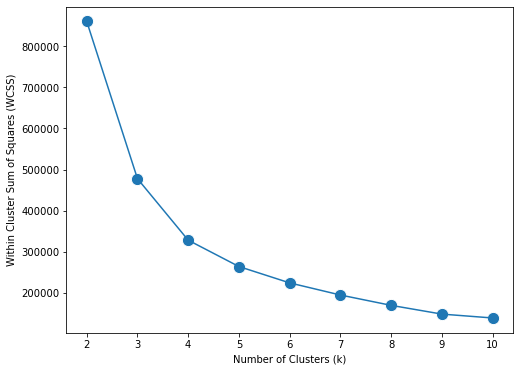

In [27]:
wcss = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(X)
    wcss.append(km.inertia_)

wcss_series = pd.Series(wcss, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = wcss_series, x = wcss_series.index)
ax = sns.scatterplot(y = wcss_series, x = wcss_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Within Cluster Sum of Squares (WCSS)')

### The Average Silhouette Score

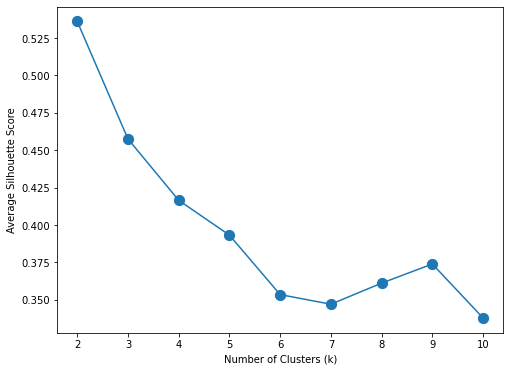

In [28]:
from sklearn.metrics import silhouette_score

silhouette = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(X)
    silhouette.append(silhouette_score(X, km.labels_))

silhouette_series = pd.Series(silhouette, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = silhouette_series, x = silhouette_series.index)
ax = sns.scatterplot(y = silhouette_series, x = silhouette_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Average Silhouette Score')

### The Calinski Harabasz Score

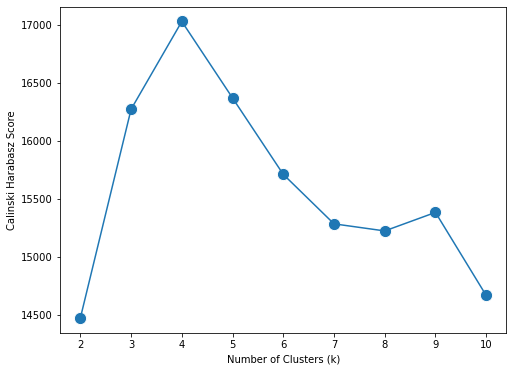

In [29]:
from sklearn.metrics import calinski_harabasz_score

calinski = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(X)
    calinski.append(calinski_harabasz_score(X, km.labels_))

calinski_series = pd.Series(calinski, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = calinski_series, x = calinski_series.index)
ax = sns.scatterplot(y = calinski_series, x = calinski_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Calinski Harabasz Score')

##### From our three graphs, we can conlude that our number of clusters should be 3

In [30]:
X.shape

(8068, 8)

In [31]:
#@title Model Building
model = KMeans(n_clusters=3, n_init=5, random_state=42)

# train model

y_kmeans=model.fit_predict(X)

In [32]:
#@title make predictions
X['cluster'] = y_kmeans
X.head()

gender  married  age  graduated  profession  workexperience  spendingscore  \
0       2        0   22          0           1             1.0              1   
1       1        1   38          1           2             1.0              2   
2       1        1   67          1           2             1.0              1   
3       2        1   67          1           3             0.0              3   
4       1        1   40          1           4             1.0              3   

   familysize  cluster  
0         4.0        1  
1         3.0        0  
2         1.0        2  
3         2.0        2  
4         6.0        0

In [33]:
X['cluster'].unique()

array([1, 0, 2])

In [34]:
#@title visualize clusters (with TSNE)
tsne = TSNE(n_components=2, verbose=1)
embedding = tsne.fit_transform(X)

C:\Users\User\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8068 samples in 0.036s...
[t-SNE] Computed neighbors for 8068 samples in 0.702s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8068
[t-SNE] Computed conditional probabilities for sample 2000 / 8068
[t-SNE] Computed conditional probabilities for sample 3000 / 8068
[t-SNE] Computed conditional probabilities for sample 4000 / 8068
[t-SNE] Computed conditional probabilities for sample 5000 / 8068
[t-SNE] Computed conditional probabilities for sample 6000 / 8068
[t-SNE] Computed conditional probabilities for sample 7000 / 8068
[t-SNE] Computed conditional probabilities for sample 8000 / 8068
[t-SNE] Computed conditional probabilities for sample 8068 / 8068
[t-SNE] Mean sigma: 1.018442
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.406631
[t-SNE] KL divergence after 1000 iterations: 0.996968


In [35]:
embedding

array([[ 51.532276,  59.70391 ],
       [ -4.954012,  35.515644],
       [-53.423885, -51.18619 ],
       ...,
       [ 18.491669, -66.30659 ],
       [ 37.982346, -51.89887 ],
       [ 13.228655,  48.636208]], dtype=float32)

In [36]:
#@title Transform the decomposed variables into a dataframe
df_decomposed = pd.DataFrame(columns=['x', 'y'], data = embedding)
df_decomposed.head()

x          y
0  51.532276  59.703911
1  -4.954012  35.515644
2 -53.423885 -51.186192
3 -52.147820 -44.474789
4  -1.929148  55.049850

In [37]:
df_decomposed['cluster'] = X['cluster']
df_decomposed.head()

x          y  cluster
0  51.532276  59.703911        1
1  -4.954012  35.515644        0
2 -53.423885 -51.186192        2
3 -52.147820 -44.474789        2
4  -1.929148  55.049850        0

In [38]:
df.head()

customerid  gender  married  age  graduated  profession  workexperience  \
0      462809       2        0   22          0           1             1.0   
1      462643       1        1   38          1           2             1.0   
2      466315       1        1   67          1           2             1.0   
3      461735       2        1   67          1           3             0.0   
4      462669       1        1   40          1           4             1.0   

   spendingscore  familysize    category segmentation  
0              1         4.0  Category 4            D  
1              2         3.0  Category 4            A  
2              1         1.0  Category 6            B  
3              3         2.0  Category 6            B  
4              3         6.0  Category 6            A

In [39]:
df_decomposed['customerid'] = df['customerid']
df_decomposed.head()

x          y  cluster  customerid
0  51.532276  59.703911        1      462809
1  -4.954012  35.515644        0      462643
2 -53.423885 -51.186192        2      466315
3 -52.147820 -44.474789        2      461735
4  -1.929148  55.049850        0      462669

In [40]:
id = [467371, 463783]
df[df['customerid'].isin(id)]

customerid  gender  married  age  graduated  profession  workexperience  \
5820      463783       1        0   30          0           1             1.0   
5958      467371       2        0   30          1           1             1.0   

      spendingscore  familysize    category segmentation  
5820              1         3.0         NaN            C  
5958              1         4.0  Category 6            B

In [41]:
#@title visualize clusters
import plotly.express as px

fig = px.scatter(
    df_decomposed, x = 'x', y = 'y', color = 'cluster', hover_data = ['x', 'y', 'cluster', 'customerid']
)
fig.show()

In [42]:
#@title PCA
pca = PCA(n_components=2)
decom = pca.fit_transform(X)
decom

array([[-21.48543422,  -2.61813581],
       [ -5.44209763,  -1.88500648],
       [ 23.57354171,  -0.84755817],
       ...,
       [-10.42239402,  -2.04004021],
       [-16.48710977,  -2.43537131],
       [ -6.32247099,  -2.46784218]])

In [43]:
df_decomposed = pd.DataFrame(columns=['x', 'y'], data = decom)
df_decomposed.head()

x         y
0 -21.485434 -2.618136
1  -5.442098 -1.885006
2  23.573542 -0.847558
3  23.639264 -1.797555
4  -3.467059 -1.793998

In [44]:
df_decomposed['cluster'] = X['cluster']
df_decomposed['customerid'] = df['customerid']
df_decomposed.head()

x         y  cluster  customerid
0 -21.485434 -2.618136        1      462809
1  -5.442098 -1.885006        0      462643
2  23.573542 -0.847558        2      466315
3  23.639264 -1.797555        2      461735
4  -3.467059 -1.793998        0      462669

In [45]:
#@title visualize clusters
import plotly.express as px

fig = px.scatter(
    df_decomposed, x = 'x', y = 'y', color = 'cluster', hover_data = ['x', 'y', 'cluster', 'customerid']
)
fig.show()